<a href="https://colab.research.google.com/github/MrCamilo5/MarkowitzPorfolioBVC/blob/main/MKWPortfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPortfolioOpt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
from pypfopt import risk_models
from pypfopt import expected_returns
import scipy.stats as ss

In [3]:
plt.style.use('fivethirtyeight')
np.random.seed(1999)

In [4]:
datos=pd.read_csv('presio.csv', index_col=[0], parse_dates=True)
datos.describe().round(2)

,NUTRESA,ISA,GRUPOSURA,BCOLOMBIA,PROMIGAS,GEB,TERPEL
count,244.00,244.00,244.00,244.00,244.00,244.00,244.00
mean,22278.85,20525.61,22237.79,27883.85,7293.30,2418.36,7980.57
std,1630.82,3145.24,3370.66,5058.07,483.55,171.17,951.72
min,17000.00,11800.00,15000.00,17700.00,6500.00,1760.00,6300.00
25%,21195.00,18665.00,20100.00,24800.00,6900.00,2333.75,7145.00
50%,22200.00,19900.00,21410.00,25990.00,7170.00,2430.00,8000.00
75%,23577.50,22305.00,23610.00,30625.00,7795.00,2522.75,8380.00
max,25300.00,29250.00,33600.00,44700.00,8400.00,2840.00,10860.00


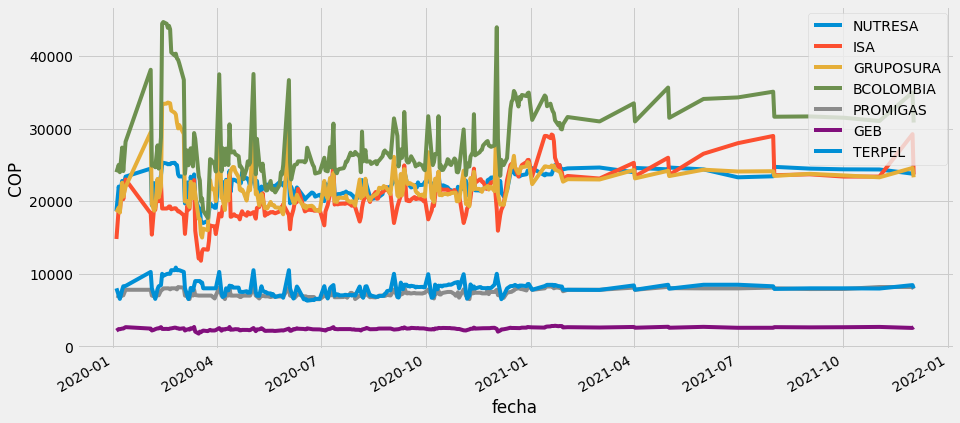

In [5]:
datos.plot(figsize=(14,7), ylabel='COP')
# plt.savefig('historicos.pdf')

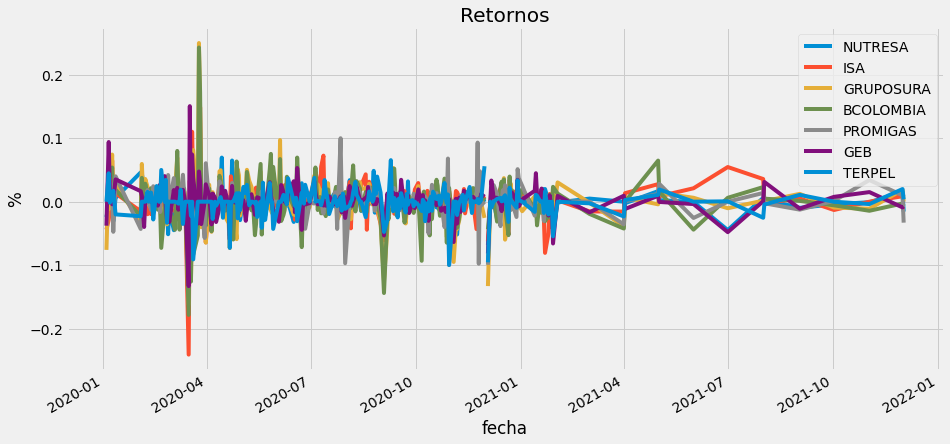

In [6]:
retornos=datos.pct_change()
retornos.plot(figsize=(14,7), title='Retornos', ylabel='%')
# plt.savefig('ret.pdf')

In [7]:
cov_ret=retornos.cov()
corr_ret=retornos.corr()

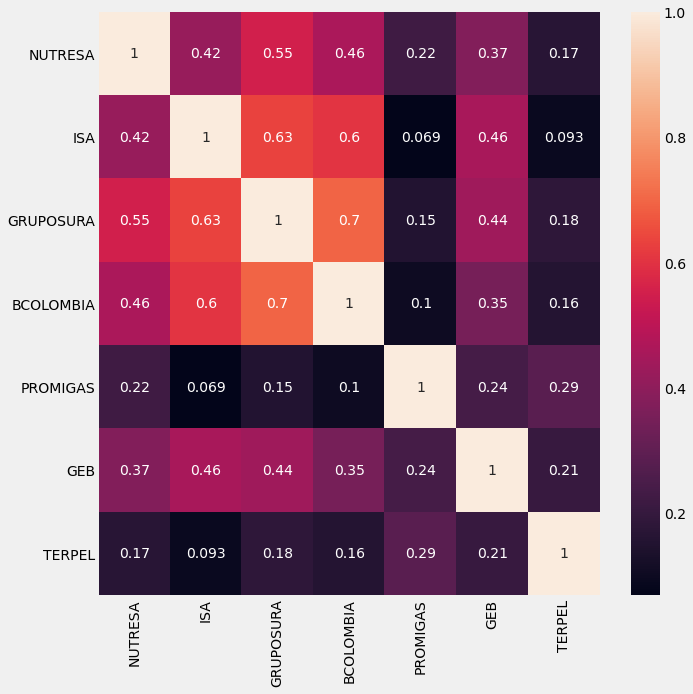

In [8]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_ret, annot=True)
# plt.savefig('corr.pdf')

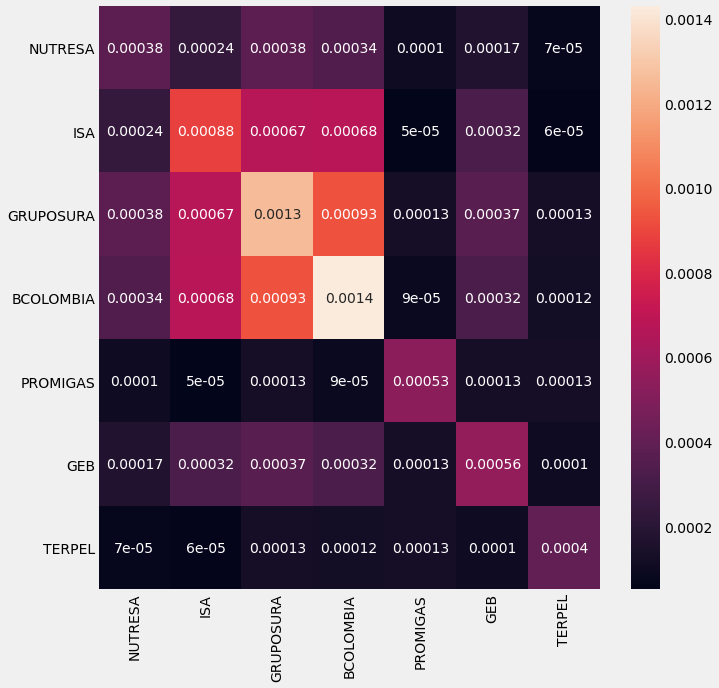

In [9]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(cov_ret.round(5), annot=True)
# plt.savefig('cov.pdf')

In [10]:
pesos=np.array([1/7 for i in range(7)])

In [12]:
#Variancia del portafolio 
varport=np.dot(pesos.T, np.dot(cov_ret,pesos))
#Volatilidad
volport=np.sqrt(varport)
#Retorno Semestral
retornosimplesem=np.sum(retornos.mean().values*pesos)

In [13]:
print('Varianza Semestral'+ ' ',np.round(varport,5)*100)
print('Volatilidad Semestral'+ ' ',np.round(volport,5)*100)
print('Retorno esperado sem'+ ' ',np.round(retornosimplesem,5)*100)

Varianza Semestral  0.034
Volatilidad Semestral  1.8339999999999999
Retorno esperado sem  0.002


In [14]:
mu=expected_returns.mean_historical_return(datos)
S=risk_models.sample_cov(datos)

In [15]:
froe=EfficientFrontier(mu,S)
# froe.add_constraint(lambda x: x[3]+x[6]==0.3)
pesos2=froe.max_sharpe()
peslim=froe.clean_weights()

In [16]:
peslim

OrderedDict([('NUTRESA', 0.0),
             ('ISA', 0.99182),
             ('GRUPOSURA', 0.0),
             ('BCOLOMBIA', 0.0),
             ('PROMIGAS', 0.0),
             ('GEB', 0.00818),
             ('TERPEL', 0.0)])

In [17]:
froe.portfolio_performance(verbose=True)

Expected annual return: 26.9%
Annual volatility: 46.9%
Sharpe Ratio: 0.53


(0.2690948729679076, 0.46926734710474316, 0.530816547336519)

In [20]:
info=froe.portfolio_performance()
print('Porobabilidad de perdida'+ ' ')
print(np.round(ss.norm.cdf(0 ,info[0], info[1]) * 100 ,2),'%')

Porobabilidad de perdida 
28.32 %
